In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import BatchNormalization,Dense, Reshape, Dropout # type: ignore
from tensorflow.keras.regularizers import l2
from keras import regularizers
import os
import pydot
from tensorflow.keras.utils import model_to_dot, plot_model
from IPython.display import SVG
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


## double peak

In [67]:
subfolder = 'datasets'
file_path = os.path.join(subfolder, 'dp_dataset.csv')
loaded_data = np.loadtxt(file_path, delimiter=',')
y_point=201
singlepoint=2010
doubleponit=3000
specall_loaded = loaded_data[:, :y_point]
I_loaded = loaded_data[:, y_point:]

In [68]:
#train, validation and test sets division
inputs_all =I_loaded
targets_all=specall_loaded

inputs_train=inputs_all[0:int(singlepoint+0.7*doubleponit)]
targets_train=targets_all[0:int(singlepoint+0.7*doubleponit)]
inputs_val=inputs_all[int(singlepoint+0.7*doubleponit):int(singlepoint+0.8*doubleponit)]
targets_val=targets_all[int(singlepoint+0.7*doubleponit):int(singlepoint+0.8*doubleponit)]
inputs_test=inputs_all[int(singlepoint+0.8*doubleponit):]
targets_test=targets_all[int(singlepoint+0.8*doubleponit):]

np.random.seed(13)
np.random.shuffle(inputs_train)
np.random.seed(13)
np.random.shuffle(targets_train)
np.random.seed(14)
np.random.shuffle(inputs_val)
np.random.seed(14)
np.random.shuffle(targets_val)

Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0074 - val_loss: 0.0068 - learning_rate: 0.0010
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - val_loss: 0.0065 - learning_rate: 0.0010
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0047 - val_loss: 0.0066 - learning_rate: 0.0010
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - val_loss: 0.0067 - learning_rate: 0.0010
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - val_loss: 0.0064 - learning_rate: 0.0010
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0043 - val_loss: 0.0062 - learning_rate: 0.0010
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 - val_loss: 0.0061 - learning_rate: 0.0010
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - val_loss: 0.0059 - learning_rate: 0.0010
Epoch 9/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - val_loss: 0.0059 - learning_rate: 0.0010
Epoch 10/200
33/33

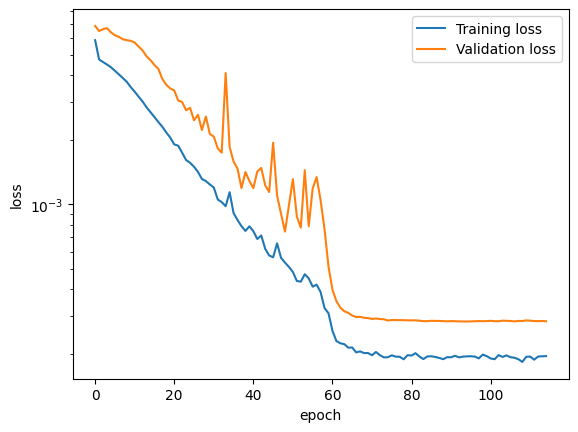

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=16, activation='relu',kernel_regularizer=l2(0.0000001)))
model.add(Dense(250, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dense(300, activation='relu')) 
model.add(Dense(201))

model.compile(loss='mean_squared_error', optimizer='adamw')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.005, patience=10, min_lr=1e-6)

history = model.fit(inputs_train, targets_train, epochs=200, batch_size=128, validation_data=(inputs_val, targets_val),
                    callbacks=[early_stopping, lr_scheduler])

mse = model.evaluate(inputs_val, targets_val)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

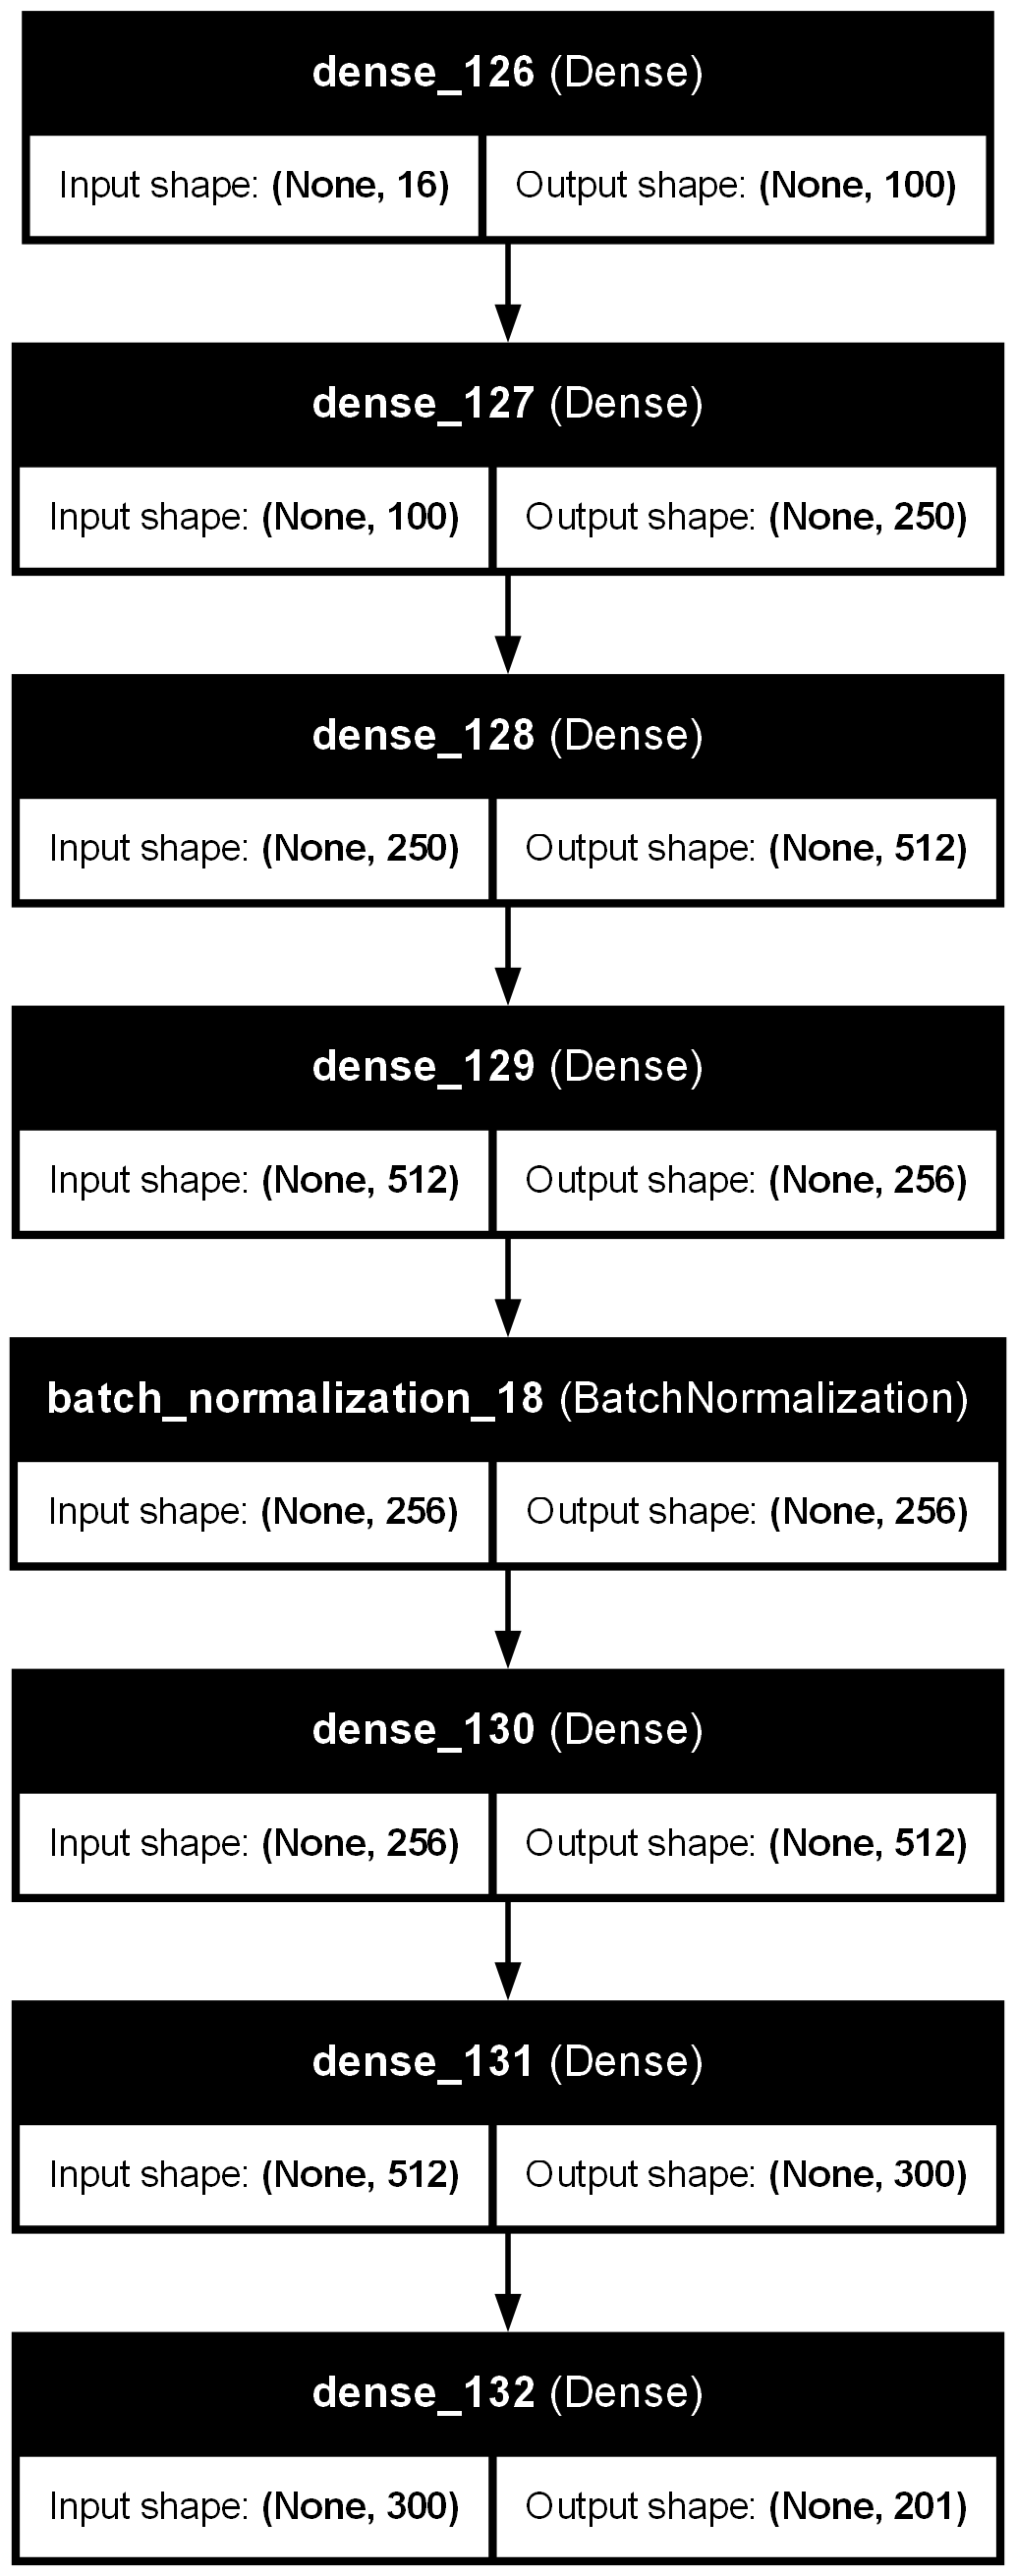

In [56]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
# 显示 SVG 图像
dot = model_to_dot(model, show_shapes=False, show_layer_names=True, dpi=60)
SVG(dot.create(prog='dot', format='svg'))
plot_model(model, to_file='dpmodel2-4_val3-4.png', show_shapes=True, show_layer_names=True)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


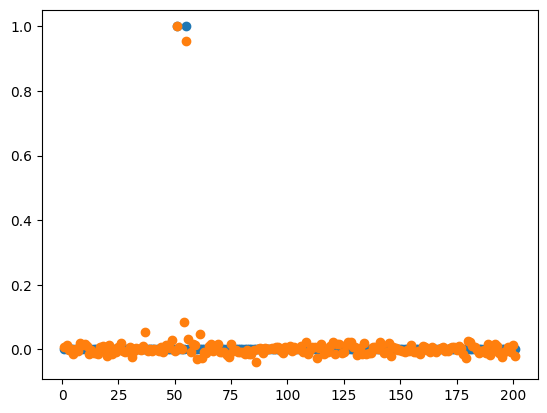

In [ ]:
targets=targets_test
targets_pre=model.predict(inputs_test)
targets=targets/targets.max(axis=1, keepdims=True)
targets_pre=targets_pre/targets_pre.max(axis=1, keepdims=True)
L=np.arange(start=1,stop=y_point+1,step=1)
ith=92
plt.figure(1)
plt.scatter(L,targets[ith,0:y_point])
plt.scatter(L,targets_pre[ith,0:y_point])
